### Import librairies

In [1]:
#!pip install opencv-python
#!pip install timm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import re
import warnings
import random
import ast
from utils import get_pics, plot_imgs, sift_score

warnings.filterwarnings('ignore')

/Users/linainsaf/miniconda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Import Data

In [4]:
df_listing = pd.read_csv("data/listing.csv")
print(len(df_listing))

1428


### Create column for pictures directories

In [5]:
df_listing["pictures_dir"] =[ [] for i in range(len(df_listing))]
files =os.listdir("data/pictures/") 
i=0
for f in files:
    list_id = int(re.findall(r'\d+', f)[0])
    dir_pic = "data/pictures/" + f
    match = df_listing[df_listing["listing_id"]==list_id]
    try :
        match.pictures.values[0].append(dir_pic)
    except:
        continue

In [6]:
# save new df
df_listing.to_csv("data/listing.csv")

### Apply SIFT on images and matche features

Good matches :  56
Total Keypoints :  425
How likely:  13.176470588235295 %


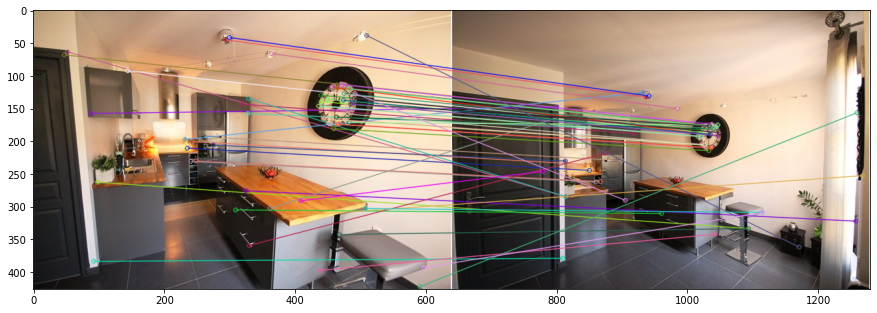

(<matplotlib.image.AxesImage at 0x299d277c0>, None)

In [7]:
# read images
img1 =  cv2.imread('data/pictures/44432__3.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 =  cv2.imread('data/pictures/41529__7.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

score, keypoints_1, keypoints_2,  good_matches, keypoints= sift_score(img1,img2,ratio = 0.8)

print("Good matches : ", len(good_matches))
print("Total Keypoints : ", keypoints)

print("How likely: ", score, "%")

# cv.drawMatchesKnn expects list of lists as matches.
plt.figure(figsize=(15, 20))
img3 = cv2.drawMatchesKnn(img1, keypoints_1,img2, keypoints_2,good_matches,None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

### Testing on few data

In [8]:
data = pd.read_csv("data/pairs.csv")

In [9]:
scores = []
for i in range(20):
    print(i)
    images1 = ast.literal_eval(df_listing[df_listing["listing_id"]==data["listing_id_1"].values[i]]["pictures"].values[0])
    images2 = ast.literal_eval(df_listing[df_listing["listing_id"]==data["listing_id_2"].values[i]]["pictures"].values[0])
    tot_score = 0
    for i in images1:
        image1 = cv2.imread(i)
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        for j in images2:
            image2 = cv2.imread(j)
            image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
            score, keypoints_1, keypoints_2,  good_matches, keypoints= sift_score(image1, image2, ratio=0.8)
            tot_score += score
    scores.append(tot_score/(len(images1)*len(images2)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [10]:
results = data[:20]
results["scores"] = scores
results.head(20)

,Unnamed: 0,listing_id_1,listing_id_2,labels,scores
0,0,120777696,116630376,1,14.986369
1,1,120793420,121050028,1,3.315454
2,2,118823311,111300261,1,3.361345
3,3,112597318,102266138,0,3.965053
4,4,72795989,68729895,1,24.268484
5,5,116948417,118789539,1,24.362710
6,6,119253235,35030927,0,7.794219
7,7,71958413,64731203,0,4.086422
8,8,115234728,116548598,1,42.536301
9,9,122684207,118198070,0,7.344287


In [11]:
results.to_csv("data/sift_results.csv")

7


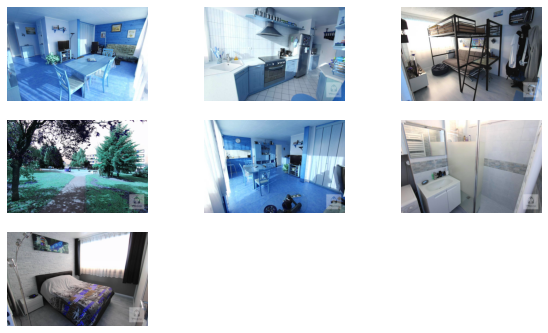

In [2]:
plot_imgs(116382348)

10


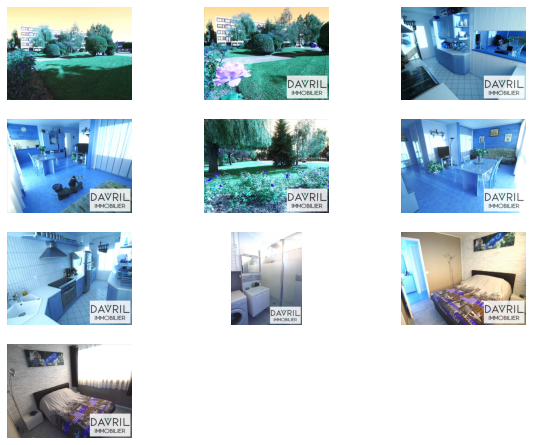

In [3]:
plot_imgs(120094263)

Good matches :  863
Total Keypoints :  3331
How likely:  25.90813569498649 %


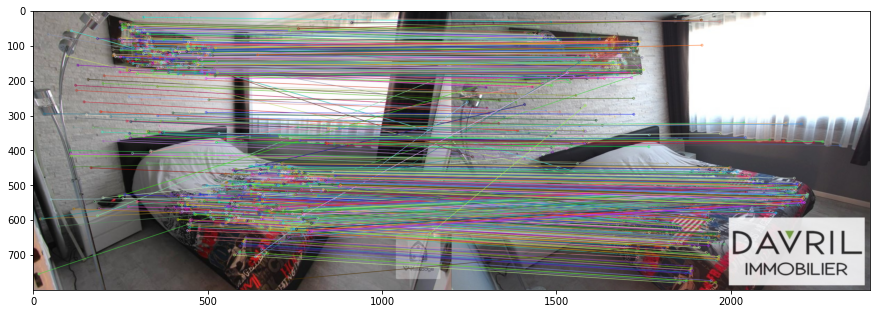

(<matplotlib.image.AxesImage at 0x2bfc185e0>, None)

In [20]:
# read images
img1 =  cv2.imread('data/pictures/116382348__1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 =  cv2.imread('data/pictures/120094263__9.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

hight = max(np.shape(img1)[0],np.shape(img2)[0])
width = max(np.shape(img1)[1],np.shape(img2)[1])

img1 = cv2.resize(np.array(img1), (width, hight))                           
img2 = cv2.resize(np.array(img2), (width, hight))

score, keypoints_1, keypoints_2,  good_matches, keypoints= sift_score(img1,img2,ratio = 0.8)

print("Good matches : ", len(good_matches))
print("Total Keypoints : ", keypoints)

print("How likely: ", score, "%")

# cv.drawMatchesKnn expects list of lists as matches.
plt.figure(figsize=(15, 20))
img3 = cv2.drawMatchesKnn(img1, keypoints_1,img2, keypoints_2,good_matches,None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()